# Diabetics Classification

Our dataset contains information about family conditions and personal health data. Based on this health information, we are building a classification model to predict whether a person is at risk of developing diabetics.
 

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

### Importing Data

In [249]:
diabetics = pd.read_csv('Files/diabetes_dataset.csv')
diabetics.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,7.9,7.9,0,0,0,30.5,0.89,134,78,68,239,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,6.5,8.7,0,0,0,23.1,0.80,129,76,67,116,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,10.0,8.1,1,0,0,22.2,0.81,115,73,74,213,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,6.6,5.2,0,0,0,26.8,0.88,120,93,68,171,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,7.4,5.0,0,0,0,21.2,0.78,92,67,67,210,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


### Data Inspection

In [250]:
diabetics.shape

(100000, 31)

In [251]:
diabetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

Here we are predicting diabetes, so we do not need the columns that already indicate whether a patient has diabetes. 

Therefore, we are removing diabetes_risk_score and diabetes_stage.

In [252]:
diabetics.drop(['diabetes_risk_score','diabetes_stage'],axis=1,inplace = True)

In [253]:
diabetics.describe(percentiles=[0.25,.5,.7,.9,.95,.99])

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,0.856078,115.799610,75.23249,69.632870,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,0.046837,14.284073,8.20425,8.371954,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,0.670000,90.000000,50.00000,40.000000,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,0.820000,106.000000,70.00000,64.000000,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,0.860000,116.000000,75.00000,70.000000,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,1.000000
70%,58.00000,3.000000,145.000000,6.900000,7.600000,7.300000,0.000000,0.000000,0.000000,27.500000,0.880000,123.000000,80.00000,74.000000,203.000000,59.000000,120.000000,144.000000,118.00000,176.000000,11.630000,6.950000,1.000000
90%,71.00000,4.000000,232.000000,8.300000,8.400000,9.200000,1.000000,1.000000,0.000000,30.200000,0.920000,135.000000,86.00000,80.000000,227.000000,67.000000,147.000000,178.000000,129.00000,200.000000,15.770000,7.570000,1.000000
95%,76.00000,5.000000,284.000000,9.000000,8.800000,10.100000,1.000000,1.000000,1.000000,31.500000,0.930000,140.000000,89.00000,83.000000,239.000000,71.000000,161.000000,194.000000,134.00000,211.000000,17.780000,7.870000,1.000000
99%,87.00000,6.000000,394.000000,10.000000,9.500000,11.800000,1.000000,1.000000,1.000000,34.000000,0.970000,150.000000,94.00000,89.000000,261.000000,78.000000,185.000000,224.000000,143.00000,233.000000,21.450000,8.420000,1.000000


There is no significant difference between the 99th percentile and the maximum value, which indicates that there are no outliers

### Data Preparation and preprocessing

Converting the categorical variables to numericals values using one-hot encoding (dummy features)

In [254]:
diabetics.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,7.9,7.9,0,0,0,30.5,0.89,134,78,68,239,41,160,145,136,236,6.36,8.18,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,6.5,8.7,0,0,0,23.1,0.80,129,76,67,116,55,50,30,93,150,2.00,5.63,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,10.0,8.1,1,0,0,22.2,0.81,115,73,74,213,66,99,36,118,195,5.07,7.51,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,6.6,5.2,0,0,0,26.8,0.88,120,93,68,171,50,79,140,139,253,5.28,9.03,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,7.4,5.0,0,0,0,21.2,0.78,92,67,67,210,52,125,160,137,184,12.74,7.20,1


In [255]:
cat_cols = ['gender','ethnicity','education_level','income_level','employment_status','smoking_status']

dummies = pd.get_dummies(diabetics[cat_cols],drop_first=True).astype(int)
dummies.head()

,gender_Male,gender_Other,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,education_level_Highschool,education_level_No formal,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1


Merging the two datasets with converted categorical columns into the original dataset and dropping the original columns.

In [256]:
final_diabetics = pd.concat([diabetics,dummies],axis=1)
final_diabetics.drop(cat_cols,axis=1,inplace=True)
final_diabetics.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diagnosed_diabetes,gender_Male,gender_Other,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,education_level_Highschool,education_level_No formal,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,0.89,134,78,68,239,41,160,145,136,236,6.36,8.18,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,0.80,129,76,67,116,55,50,30,93,150,2.00,5.63,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
2,60,1,57,6.4,10.0,8.1,1,0,0,22.2,0.81,115,73,74,213,66,99,36,118,195,5.07,7.51,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,0.88,120,93,68,171,50,79,140,139,253,5.28,9.03,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,0.78,92,67,67,210,52,125,160,137,184,12.74,7.20,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1


In [257]:
final_diabetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   alcohol_consumption_per_week        100000 non-null  int64  
 2   physical_activity_minutes_per_week  100000 non-null  int64  
 3   diet_score                          100000 non-null  float64
 4   sleep_hours_per_day                 100000 non-null  float64
 5   screen_time_hours_per_day           100000 non-null  float64
 6   family_history_diabetes             100000 non-null  int64  
 7   hypertension_history                100000 non-null  int64  
 8   cardiovascular_history              100000 non-null  int64  
 9   bmi                                 100000 non-null  float64
 10  waist_to_hip_ratio                  100000 non-null  float64
 11  systolic_bp                

Now our dataset is ready for building model

### Data spliting for model building

In [258]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(final_diabetics,stratify=final_diabetics['diagnosed_diabetes'],train_size=0.7,
                              random_state=7)

In [259]:
print(train.diagnosed_diabetes.value_counts(normalize=True))
print(test.diagnosed_diabetes.value_counts(normalize=True))

diagnosed_diabetes
1    0.599986
0    0.400014
Name: proportion, dtype: float64
diagnosed_diabetes
1    0.599967
0    0.400033
Name: proportion, dtype: float64


The data was properly split into training and testing sets.

In [260]:
train.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diagnosed_diabetes,gender_Male,gender_Other,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,education_level_Highschool,education_level_No formal,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never
55872,43,4,41,6.8,6.9,8.3,0,0,0,32.1,0.97,115,84,77,183,63,89,209,103,110,4.35,5.43,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
24950,41,1,81,6.4,4.6,2.7,0,1,0,24.1,0.83,126,72,77,182,54,112,110,101,150,4.15,6.15,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4833,60,3,81,10.0,5.5,6.0,1,0,0,26.0,0.87,119,80,79,185,46,128,116,116,166,2.00,6.84,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
76127,56,4,168,5.2,7.7,9.6,1,0,0,23.9,0.87,120,71,79,247,62,140,90,134,227,5.05,8.65,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
34054,48,2,92,8.2,7.0,5.6,1,0,0,23.4,0.82,110,83,57,186,61,100,148,119,145,11.51,6.42,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [261]:
train.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diagnosed_diabetes,gender_Male,gender_Other,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,education_level_Highschool,education_level_No formal,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,50.140743,2.003671,118.726214,5.991326,7.001553,5.998731,0.219643,0.250329,0.079486,25.626356,0.856098,115.828143,75.262314,69.668143,186.004129,54.060371,102.998329,121.631043,111.141900,160.123571,9.067681,6.523071,0.599986,0.477657,0.020271,0.179386,0.202057,0.050200,0.449329,0.449543,0.050643,0.150743,0.148557,0.251257,0.352671,0.198057,0.217814,0.061914,0.119414,0.198643,0.599271
std,15.591147,1.414870,84.400528,1.778476,1.095710,2.466531,0.414008,0.433205,0.270497,3.592536,0.046833,14.274421,8.208052,8.376137,32.020048,10.296415,33.373887,43.372333,13.587822,30.915500,4.957655,0.813830,0.489904,0.499504,0.140928,0.383678,0.401537,0.218359,0.497429,0.497451,0.219269,0.357801,0.355654,0.433739,0.477805,0.398538,0.412763,0.241002,0.324278,0.398981,0.490050
min,18.000000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,0.680000,90.000000,50.000000,40.000000,100.000000,20.000000,50.000000,30.000000,60.000000,70.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,0.820000,106.000000,70.000000,64.000000,164.000000,47.000000,78.000000,92.000000,102.000000,139.000000,5.110000,5.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2.000000,99.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,0.860000,116.000000,75.000000,70.000000,186.000000,54.000000,102.000000,121.000000,111.000000,160.000000,8.780000,6.520000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,61.000000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,0.890000,125.000000,81.000000,75.000000,208.000000,61.000000,126.000000,151.000000,120.000000,181.000000,12.450000,7.070000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,10.000000,833.000000,10.000000,10.000000,16.500000,1.000000,1.000000,1.000000,39.200000,1.060000,179.000000,110.000000,105.000000,310.000000,97.000000,263.000000,344.000000,172.000000,287.000000,32.220000,9.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

In [262]:
num_cols = ['age','alcohol_consumption_per_week','physical_activity_minutes_per_week','diet_score','sleep_hours_per_day',
            'screen_time_hours_per_day','bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp','heart_rate','cholesterol_total',
            'hdl_cholesterol','ldl_cholesterol','triglycerides','glucose_fasting','glucose_postprandial','insulin_level','hba1c']

In [263]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

In [264]:
y_train = train.pop('diagnosed_diabetes')
X_train = train
y_test = test.pop('diagnosed_diabetes')
X_test = test

In [265]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train, sm.add_constant(X_train),family= sm.families.Binomial())
logm1 = logm1.fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     diagnosed_diabetes   No. Observations:                70000
Model:                            GLM   Df Residuals:                    69959
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24243.
Date:                Sat, 04 Oct 2025   Deviance:                       48486.
Time:                        16:31:47   Pearson chi2:                 2.29e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4797
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.8722      0.069     12.673      0.000       0.737       1.007
age                                    0.1147      0.015      7.725      0.000       0.086       0.144
alcohol_consumption_per_week          -0.0037      0.012     -0.318      0.751      -0.026       0.019
physical_activity_minutes_per_week    -0.0916      0.012     -7.732      0.000      -0.115      -0.068
diet_score                            -0.0260      0.012     -2.226      0.026      -0.049      -0.003
sleep_hours_per_day                   -0.0016      0.011     -0.140      0.889      -0.024       0.021
screen_time_hours_per_day              0.0057      0.011      0.503      0.615      -0.017       0.028
family_history_diabetes                0.4130      0.031     13.220      0.000       0.352       0.474
hypertension_history                  -0.0083      0.027     -0.309      0.757      -0.061       0.045
cardiovascular_history                 0.0242      0.043      0.557      0.577      -0.061       0.109
bmi                                    0.0281      0.020      1.415      0.157      -0.011       0.067
waist_to_hip_ratio                     0.0184      0.018      1.033      0.301      -0.016       0.053
systolic_bp                         4.777e-05      0.014      0.003      0.997      -0.028       0.028
diastolic_bp                          -0.0190      0.012     -1.614      0.106      -0.042       0.004
heart_rate                            -0.0020      0.012     -0.166      0.868      -0.025       0.021
cholesterol_total                     -0.0022      0.035     -0.062      0.951      -0.070       0.066
hdl_cholesterol                       -0.0395      0.016     -2.499      0.012      -0.070      -0.009
ldl_cholesterol                        0.0061      0.037      0.167      0.867      -0.065       0.078
triglycerides                          0.0247      0.013      1.958      0.050   -3.05e-05       0.049
glucose_fasting                        0.2063      0.018     11.665      0.000       0.172       0.241
glucose_postprandial                   0.0046      0.033      0.139      0.889      -0.060       0.069
insulin_level                          0.0018      0.012      0.144      0.886      -0.023       0.026
hba1c                                  2.8032      0.042     67.268      0.000       2.722       2.885
gender_Male                           -0.0236      0.023     -1.025      0.305      -0.069       0.022
gender_Other                           0.1503      0.084      1.781      0.075      -0.015       0.316
ethnicity_Black                       -0.0059      0.043     -0.138      0.890      -0.089       0.078
ethnicity_Hispanic                    -0.0137      0.041     -0.331      0.741      -0.095      

In [266]:
import importlib
import variance_inflation_factor_data as vif_class

# Reload the module to get latest changes
importlib.reload(vif_class)

vif = vif_class.VIF(X_train)

vif.get_vif_values()

,Features,VIF
21,hba1c,10.60
16,ldl_cholesterol,10.31
14,cholesterol_total,9.39
19,glucose_postprandial,8.28
33,income_level_Middle,4.14
27,ethnicity_White,3.90
39,smoking_status_Never,3.67
32,income_level_Lower-Middle,3.24
9,bmi,3.03
34,income_level_Upper-Middle,2.77


In [267]:
'''
Feature selection using Recursive Feature Elimination

'''
import importlib
import recursive_feature_elemination as rfe_process

# Reload the module to get latest changes
importlib.reload(rfe_process)
number_of_features = 20
rfe_class = rfe_process.RfeClass(X_train,y_train,number_of_features)
rfe_class.get_rfe_output()
selected_columns = rfe_class.top_columns
selected_columns

Index(['age', 'physical_activity_minutes_per_week', 'diet_score',
       'family_history_diabetes', 'cardiovascular_history', 'bmi',
       'waist_to_hip_ratio', 'diastolic_bp', 'hdl_cholesterol',
       'triglycerides', 'glucose_fasting', 'hba1c', 'gender_Male',
       'gender_Other', 'ethnicity_White', 'education_level_Postgraduate',
       'income_level_Lower-Middle', 'income_level_Upper-Middle',
       'employment_status_Unemployed', 'smoking_status_Never'],
      dtype='object')

In [268]:
'''
Removing the highly correlared features and p-values > 0.05 features
'''
import automated_feature_selection as feature_selection

importlib.reload(feature_selection)

final_features = feature_selection.final_data(X_train[selected_columns],y_train)
final_features

                             Features  p-value   VIF
0                                 age   0.0000  1.07
1  physical_activity_minutes_per_week   0.0000  1.03
2                          diet_score   0.0268  1.05
3             family_history_diabetes   0.0000  1.16
4                                 bmi   0.0000  1.12
5                     hdl_cholesterol   0.0007  1.05
6                     glucose_fasting   0.0000  2.20
7                               hba1c   0.0000  1.96
8        education_level_Postgraduate   0.0231  1.04


['age',
 'physical_activity_minutes_per_week',
 'diet_score',
 'family_history_diabetes',
 'bmi',
 'hdl_cholesterol',
 'glucose_fasting',
 'hba1c',
 'education_level_Postgraduate']

## Final Model Building

In [269]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train[final_features],y_train)
lr

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [270]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

y_train_pred = lr.predict(X_train[final_features])

print('Confusion Matrix \n',confusion_matrix(y_train,y_train_pred))

print('Train Accuracy ' ,accuracy_score(y_train,y_train_pred))
print('Train Precision ', precision_score(y_train,y_train_pred))
print('Train Recall', recall_score(y_train,y_train_pred))


Confusion Matrix 
 [[22585  5416]
 [ 4449 37550]]
Train Accuracy  0.8590714285714286
Train Precision  0.8739468416887771
Train Recall 0.8940689064025334


In [271]:
y_test_pred = lr.predict(X_test[final_features])

print('Test Accuracy ' ,accuracy_score(y_test,y_test_pred))
print('Test Precision ', precision_score(y_test,y_test_pred))
print('Test Recall', recall_score(y_test,y_test_pred))

Test Accuracy  0.8607666666666667
Test Precision  0.8766623065184216
Test Recall 0.8936607589310517


In [272]:
from sklearn import metrics

def roc_curve(actual, prob):

    fpr, tpr,thresholds = metrics.roc_curve(actual,prob,drop_intermediate=True)
    roc_score = metrics.roc_auc_score(actual,prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f"Auc Score {round(roc_score,2)}")
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend()
    plt.show()


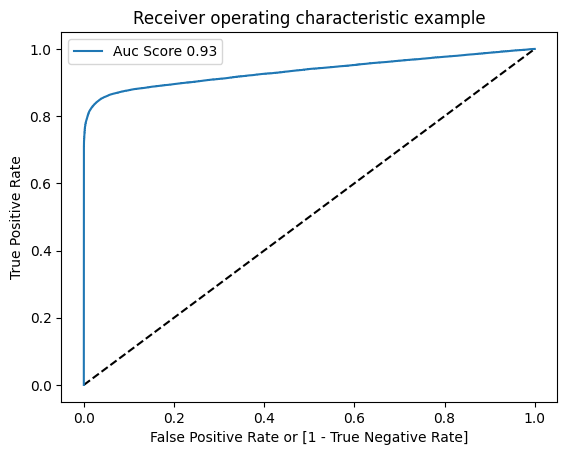

In [273]:
roc_curve(y_train,lr.predict_proba(X_train[final_features])[:, 1])

### Finding Optimal Cutoff

In [274]:
y_train_dataframe = pd.DataFrame(columns=['actual','prob'])
y_train_dataframe ['actual'] = y_train.values
y_train_dataframe['prob'] = lr.predict_proba(X_train[final_features])[:, 1]
y_train_dataframe.head()

,actual,prob
0,1,0.048150
1,0,0.323992
2,1,0.924186
3,1,0.999849
4,0,0.717379


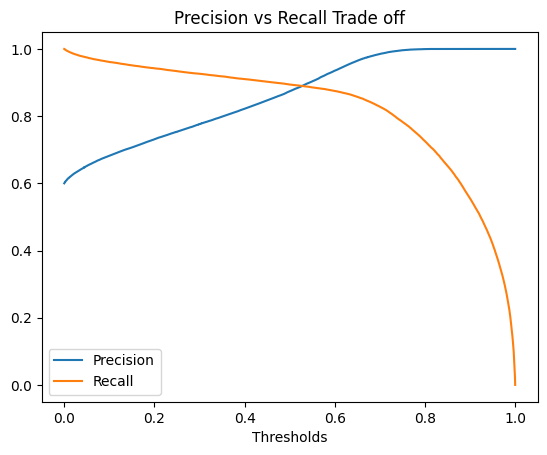

In [275]:
p, r, thresholds = metrics.precision_recall_curve(y_train_dataframe.actual, y_train_dataframe.prob)
plt.plot(thresholds, p[:-1],label='Precision')
plt.plot(thresholds, r[:-1],label='Recall')
plt.xlabel('Thresholds')
plt.title('Precision vs Recall Trade off')
plt.legend()
plt.show()

In [276]:
thresholds = [i/10 for i in range(10)]

for i in thresholds:
    y_train_dataframe[i] = y_train_dataframe['prob'].apply(lambda x : 1 if x >i else 0)

y_train_dataframe.head()


,actual,prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.048150,1,0,0,0,0,0,0,0,0,0
1,0,0.323992,1,1,1,1,0,0,0,0,0,0
2,1,0.924186,1,1,1,1,1,1,1,1,1,1
3,1,0.999849,1,1,1,1,1,1,1,1,1,1
4,0,0.717379,1,1,1,1,1,1,1,1,0,0


In [277]:
cutt_off_df = pd.DataFrame(columns=['Thresholds','Accuracy','Sensitivity','Specificity'])

for i in thresholds:
    cm1 = metrics.confusion_matrix(y_train_dataframe.actual, y_train_dataframe[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutt_off_df.loc[i] =[ i ,accuracy,sensi,speci]

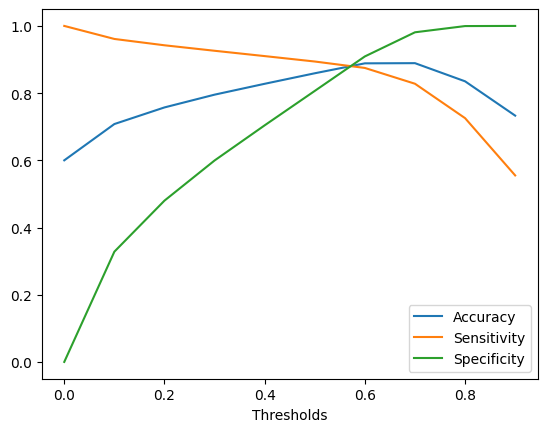

In [278]:
cutt_off_df.plot.line(x='Thresholds', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

Depending on the trade-offs and the specific application, we choose an appropriate threshold to differentiate between the classes